# Classificateurs en utilisant Scikit-Learn

Dans ce chapitre, nous allons faire le tour d'une sélection d'algorithmes d'apprentissage automatique populaires et puissants qui sont couramment utilisés dans le monde académique et industriel. Tout en apprenant les différences entre plusieurs algorithmes d'apprentissage supervisé pour la classification, nous développerons également une appréciation de leurs forces et faiblesses individuelles. En outre, nous ferons nos premiers pas avec la bibliothèque scikit-learn, qui offre une interface conviviale et cohérente pour utiliser ces algorithmes de manière efficace et productive.  

## Choix d'un algorithme de classification

Le choix d'un algorithme de classification approprié pour un problème particulier nécessite de la pratique et de l'expérience ; chaque algorithme a ses propres particularités et repose sur certaines hypothèses. Pour paraphraser le théorème "no free lunch" de David H. Wolpert, aucun classificateur ne fonctionne mieux dans tous les scénarios possibles (The Lack of A Priori Distinctions Between Learning Algorithms, Wolpert, David H, Neural Computation 8.7 (1996) : 1341-1390). Dans la pratique, il est toujours recommandé de comparer les performances d'au moins une poignée d'algorithmes d'apprentissage différents afin de sélectionner le meilleur modèle pour un problème particulier ; ces algorithmes peuvent différer par le nombre de caractéristiques ou d'exemples, la quantité de bruit dans un ensemble de données et le fait que les classes soient ou non linéairement séparables.  

En fin de compte, la performance d'un classificateur - performance de calcul et pouvoir prédictif - dépend fortement des données sous-jacentes disponibles pour l'apprentissage. Les cinq principales étapes de l'apprentissage d'un algorithme d'apprentissage automatique supervisé peuvent être résumées comme suit :

1. Sélection des caractéristiques et collecte d'exemples d'entrainement étiquetés
2. Choisir une mesure de performance
3. Choix d'un algorithme d'apprentissage et entraînement d'un modèle
4. Évaluer la performance du modèle
5. Modification des paramètres de l'algorithme et optimisation (tuning) du modèle.  

## Premiers pas avec scikit-learn - entraînement d'un perceptron

Dans la leçon précédente, vous avez découvert deux algorithmes d'apprentissage pour la classification, la règle du perceptron et Adaline, que nous avons implémentés nous-mêmes en Python et NumPy. Nous allons maintenant nous pencher sur l'API scikit-learn qui, comme nous l'avons dit, combine une interface conviviale et cohérente avec une implémentation hautement optimisée de plusieurs algorithmes de classification. La bibliothèque scikit-learn offre non seulement une grande variété d'algorithmes d'apprentissage, mais aussi de nombreuses fonctions pratiques pour prétraiter les données et pour affiner et évaluer nos modèles.  

Pour commencer à utiliser la bibliothèque scikit-learn, nous allons entraîner un modèle de perceptron similaire à celui que nous avons implementé au chapitre precedent. Par souci de simplicité, nous utiliserons l'ensemble de données Iris. Cet ensemble de données est déjà disponible via scikit-learn, puisqu'il s'agit d'un ensemble de données simple mais populaire qui est fréquemment utilisé pour tester et expérimenter des algorithmes. Comme dans le chapitre précédent, nous n'utiliserons que deux caractéristiques de l'ensemble de données Iris à des fins de visualisation.  

Nous assignerons la longueur et la largeur des pétales des 150 exemples de fleurs à la matrice des caractéristiques, X, et les étiquettes de classe correspondantes des espèces de fleurs au tableau de vecteurs, y :

In [29]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Pour évaluer les performances d'un modèle entraîné sur des données inconnues, nous diviserons l'ensemble de données en deux ensembles distincts : l'ensemble de données d'apprentissage et l'ensemble de données de test. En utilisant la fonction train_test_split du module model_selection de scikit-learn, nous divisons aléatoirement les tableaux X et y en 30 % de données de test (45 exemples) et 70 % de données de formation (105 exemples) :

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Notez que la fonction train_test_split mélange déjà les ensembles de données d'entrainement en interne avant la division ; sinon, tous les exemples des classes 0 et 1 se seraient retrouvés dans les ensembles de données d'entrainement, et l'ensemble de données de test aurait consisté en 45 exemples de la classe 2. Grâce au paramètre random_state, nous avons fourni une graine aléatoire fixe (random_state=1) pour le générateur interne de nombres pseudo-aléatoires utilisé pour mélanger les ensembles de données avant la division. L'utilisation d'un tel état aléatoire fixe garantit la reproductibilité de nos résultats.  

Enfin, nous avons tiré parti de la prise en charge intégrée de la stratification via stratify=y. Dans ce contexte, la stratification signifie que la méthode train_test_split renvoie des sous-ensembles d'entraînement et de test qui ont les mêmes proportions d'étiquettes de classe que l'ensemble de données d'entrée. Nous pouvons utiliser la fonction bincount de NumPy, qui compte le nombre d'occurrences de chaque valeur dans un tableau, pour vérifier que c'est bien le cas :

In [31]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


De nombreux algorithmes d'apprentissage automatique et d'optimisation nécessitent également une mise à l'échelle des caractéristiques pour des performances optimales, comme nous l'avons vu dans l'exemple de la descente de gradient au chapitre 1. Ici, nous allons standardiser les caractéristiques à l'aide de la classe StandardScaler du module de prétraitement de scikit-learn :

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

À l'aide du code précédent, nous avons chargé la classe StandardScaler du module preprocessing et initialisé un nouvel objet StandardScaler que nous avons assigné à la variable sc. À l'aide de la méthode fit, StandardScaler a estimé les paramètres $𝜇$ (moyenne de l'échantillon) et $𝜎$ (écart-type) pour chaque dimension de caractéristique à partir des données d'entrainement. En appelant la méthode transform, nous avons ensuite standardisé les données d'entrainement à l'aide de ces paramètres estimés, $𝜇$ et $𝜎$ . Il convient de noter que nous avons utilisé les mêmes paramètres d'échelle pour standardiser l'ensemble de données de test afin que les valeurs de l'ensemble de données d'entrainement et de test soient comparables entre elles.  

Après avoir standardisé les données d'entraînement, nous pouvons maintenant entraîner un modèle de perceptron. La plupart des algorithmes de scikit-learn prennent déjà en charge la classification multiclasse par défaut via la méthode OvR (one-versus-rest), ce qui nous permet d'introduire les trois classes de fleurs dans le perceptron en une seule fois. Le code est le suivant :  

In [33]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

L'interface scikit-learn vous rappellera notre implémentation du perceptron au chapitre 1. Après avoir chargé la classe Perceptron du module linear_model, nous avons initialisé un nouvel objet Perceptron et entraîné le modèle via la méthode fit. Ici, le paramètre du modèle, eta0, est équivalent au taux d'apprentissage, eta, que nous avons utilisé dans notre propre implémentation du perceptron.  

La recherche d'un taux d'apprentissage approprié nécessite une certaine expérimentation. Si le taux d'apprentissage est trop élevé, l'algorithme dépassera le minimum de perte globale. Si le taux d'apprentissage est trop faible, l'algorithme nécessitera plus d'époques jusqu'à la convergence, ce qui peut rendre l'apprentissage lent, en particulier pour les grands ensembles de données. Nous avons également utilisé le paramètre random_state pour garantir la reproductibilité du mélange initial de l'ensemble de données d'apprentissage après chaque période.  

Après avoir entraîné un modèle dans scikit-learn, nous pouvons faire des prédictions via la méthode predict, tout comme dans notre propre implémentation du perceptron. Le code est le suivant :

In [34]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


En exécutant le code, nous constatons que le perceptron classe mal 1 des 45 exemples de fleurs. L'erreur de classification sur l'ensemble de données de test est donc d'environ $0,022$, soit $2,2$%  $(1/45 ≈ 0,022 )$.  

Notez que scikit-learn implémente également une grande variété de mesures de performance différentes qui sont disponibles via le module metrics. Par exemple, nous pouvons calculer la précision de classification du perceptron sur le jeu de données de test comme suit :

In [35]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


Ici, y_test représente les vraies étiquettes de classe et y_pred les étiquettes de classe que nous avons prédites précédemment. Alternativement, chaque classificateur dans scikit-learn a une méthode score, qui calcule la précision de prédiction d'un classificateur en combinant l'appel predict avec accuracy_score, comme montré ici :

In [36]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


Maintenant visualisons notre classification:

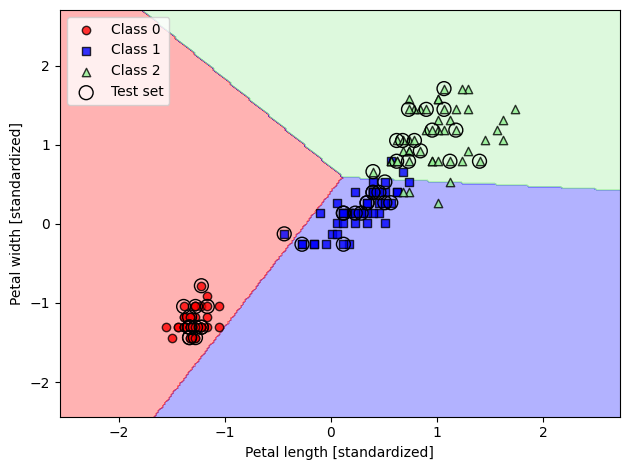

In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Comme le montre le graphique obtenu, les trois classes de fleurs ne peuvent pas être parfaitement séparées par une limite de décision linéaire.  




# Modélisation des probabilités de classe par régression logistique

Bien que la règle du perceptron constitue une introduction agréable et facile aux algorithmes d'apprentissage automatique pour la classification, son principal inconvénient est qu'elle ne converge jamais si les classes ne sont pas parfaitement séparables linéairement. La tâche de classification présentée dans la section précédente est un exemple de ce type de scénario. La raison en est que les poids sont continuellement mis à jour puisqu'il y a toujours au moins un exemple d'entrainement mal classé à chaque epoch. Bien entendu, vous pouvez modifier le taux d'apprentissage et augmenter le nombre d'epochs, mais sachez que le perceptron ne convergera jamais sur cet ensemble de données.  

Pour mieux utiliser notre temps, nous allons maintenant examiner un autre algorithme simple, mais plus puissant, pour les problèmes de classification linéaire et binaire : la régression logistique. Notez que, malgré son nom, la régression logistique est un modèle de classification et non de régression.

## Régression logistique et probabilités conditionnelles

La régression logistique est un modèle de classification très facile à implémenter et très performant pour les classes linéairement séparables.  

Pour expliquer les principaux mécanismes qui expliquent la régression logistique en tant que modèle probabiliste pour la classification binaire, introduisons d'abord les chances (odds) : les chances en faveur d'un événement particulier. La chance peut s'écrire $𝑝/(1-𝑝)$ , où $p$ représente la probabilité de l'événement positif. Le terme "événement positif" ne signifie pas nécessairement "bon", mais fait référence à l'événement que nous voulons prédire, par exemple, la probabilité qu'un patient soit atteint d'une certaine maladie compte tenu de certains symptômes ; nous pouvons considérer l'événement positif comme l'étiquette de classe $y = 1$ et les symptômes comme les caractéristiques $x$. Par conséquent, par souci de concision, nous pouvons définir la probabilité $p$ comme $p := p(y = 1|x)$, la probabilité conditionnelle qu'un exemple particulier appartienne à une certaine classe $1$ compte tenu de ses caractéristiques $x$.  

Nous pouvons ensuite définir la fonction **logit**, qui est simplement le logarithme des chances (log-odds) :  

$logit(p) = log(\frac{p}{(1-p)})$  

La fonction logit prend des valeurs d'entrée comprises entre 0 et 1 et les transforme en valeurs sur l'ensemble de la plage des nombres réels.  

Dans le modèle logistique, nous supposons qu'il existe une relation linéaire entre les entrées pondérées et les logarithmes des probabilités :  

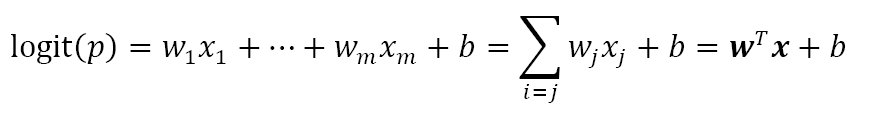  


Bien que les éléments précédents décrivent une hypothèse sur la relation linéaire entre les log-odds et les entrées nettes, ce qui nous intéresse en réalité est la probabilité p, la probabilité d'appartenance à une classe d'un exemple compte tenu de ses caractéristiques. Alors que la fonction logit fait correspondre la probabilité à une plage de nombres réels, nous pouvons considérer l'inverse de cette fonction pour faire correspondre la plage de nombres réels à une plage $[0, 1]$ pour la probabilité $p$.  

L'inverse de la fonction logit est généralement appelé **fonction sigmoïde logistique**, parfois simplement abrégée en **fonction sigmoïde** en raison de sa forme en S caractéristique :  

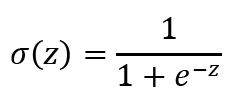

Avec $ z = w^{T}x+b$.  

Traçons maintenant la fonction sigmoïde pour quelques valeurs comprises entre -7 et 7 pour voir ce que cela donne :

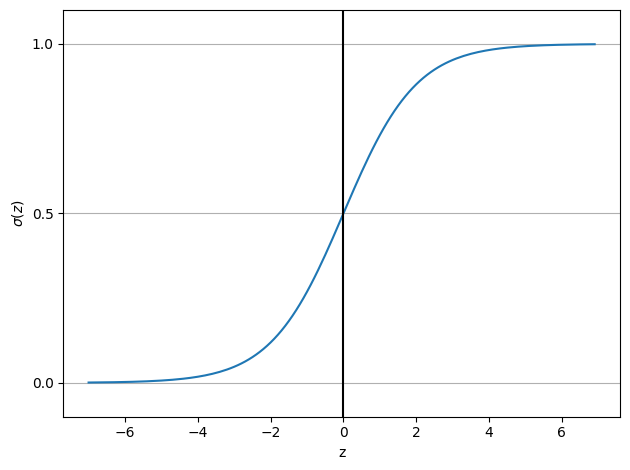

In [38]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

Nous pouvons voir que $𝜎(𝑧)$ se rapproche de $1$ si $z$ tend vers l'infini $(z→∞)$ puisque $e^{-z}$ devient très petit pour les grandes valeurs de $z$. De même, $𝜎(𝑧)$ se rapproche de $0$ pour $z→-∞$ en raison d'un dénominateur de plus en plus grand. Nous pouvons donc conclure que cette fonction sigmoïde prend en entrée des valeurs de nombres réels et les transforme en valeurs comprises dans l'intervalle $[0, 1]$ avec une interception à $𝜎(0) = 0,5$.  

Pour mieux comprendre le modèle de régression logistique, nous pouvons le relier au chapitre 1. Dans Adaline, nous avons utilisé la fonction d'identité, $𝜎(𝑧) = 𝑧$ , comme fonction d'activation. Dans la régression logistique, cette fonction d'activation devient simplement la fonction sigmoïde que nous avons définie précédemment.  

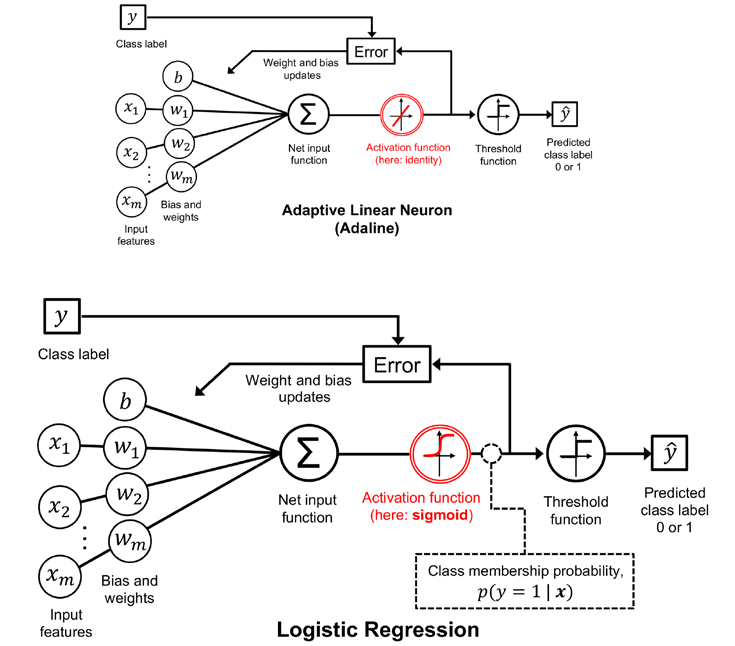

La sortie de la fonction sigmoïde est alors interprétée comme la probabilité qu'un exemple particulier appartienne à la classe $1$, $𝜎(𝑧) = 𝑝(𝑦=1|𝒙;w,b)$, compte tenu de ses caractéristiques, $x$, et paramétrées par les poids et le biais, $w$ et $b$. Par exemple, si nous calculons $𝜎(𝑧) = 0,8$ pour un exemple de fleur particulier, cela signifie que la probabilité que cet exemple soit une fleur Iris-versicolor est de 80 %. Par conséquent, la probabilité que cette fleur soit une fleur Iris-setosa peut être calculée comme $p(y = 0|x ; w, b) = 1 - p(y = 1|x; w, b) = 0,2$, ou $20$ pour cent.  

La probabilité prédite peut alors être simplement convertie en un résultat binaire par le biais d'une fonction de seuil :  

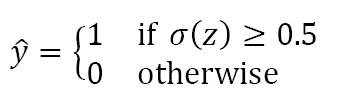

Si l'on considère le tracé précédent de la fonction sigmoïde, cela équivaut à ce qui suit :  

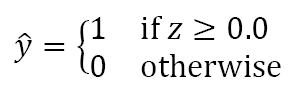

En fait, il existe de nombreuses applications dans lesquelles nous ne sommes pas seulement intéressés par les étiquettes de classe prédites, mais où l'estimation de la probabilité d'appartenance à une classe est particulièrement utile (la sortie de la fonction sigmoïde avant l'application de la fonction de seuil). La régression logistique est utilisée dans les prévisions météorologiques, par exemple, non seulement pour prédire s'il va pleuvoir un jour donné, mais aussi pour indiquer la probabilité de pluie. De même, la régression logistique peut être utilisée pour prédire la probabilité qu'un patient soit atteint d'une maladie particulière en fonction de certains symptômes, raison pour laquelle la régression logistique jouit d'une grande popularité dans le domaine de la médecine.  



## Apprentissage des poids du modèle via la fonction de perte logistique:

Vous avez appris comment utiliser le modèle de régression logistique pour prédire les probabilités et les étiquettes de classe ; maintenant, parlons brièvement de la façon dont nous ajustons les paramètres du modèle, par exemple, les poids et l'unité de biais, w et b. Dans le chapitre précédent, nous avons défini la fonction de perte de l'erreur quadratique moyenne de la façon suivante :  

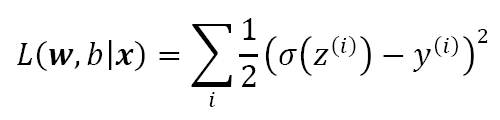

Nous avons minimisé cette fonction afin d'apprendre les paramètres de notre modèle de classification Adaline. Pour expliquer comment nous pouvons dériver la fonction de perte pour la régression logistique, définissons d'abord la probabilité, $ℒ$ , que nous voulons maximiser lorsque nous construisons un modèle de régression logistique, en supposant que les exemples individuels de notre ensemble de données sont indépendants les uns des autres. La formule est la suivante :  

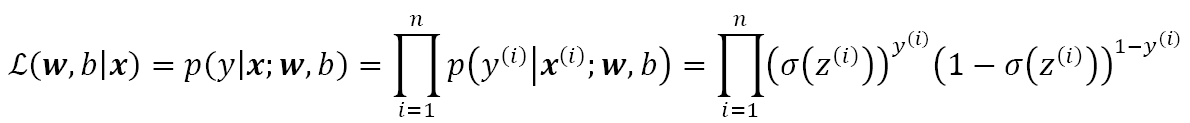

En pratique, il est plus facile de maximiser le logarithme (naturel) de cette équation, appelée fonction de log-vraisemblance :  

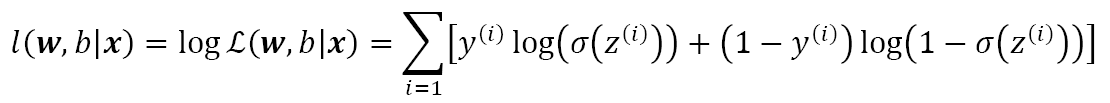

Tout d'abord, l'application de la fonction logarithmique réduit le risque de d'underflow numérique, qui peut se produire si les probabilités sont très faibles. Deuxièmement, nous pouvons convertir le produit de facteurs en une somme de facteurs, ce qui facilite l'obtention de la dérivée de cette fonction par le biais de l'addition.  

Nous pouvons maintenant utiliser un algorithme d'optimisation tel que la montée de gradient pour maximiser cette fonction de log-vraisemblance. (La montée de gradient fonctionne exactement de la même manière que la descente de gradient expliquée au chapitre 1, sauf que la montée de gradient maximise une fonction au lieu de la minimiser). Alternativement, réécrivons la log-vraisemblance comme une fonction de perte, $L$, qui peut être minimisée à l'aide de la descente de gradient comme dans le chapitre 1 :  

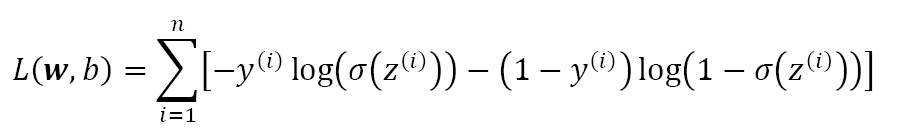



Pour mieux comprendre cette fonction de perte, examinons la perte que nous calculons pour un seul exemple d'entrainement :  

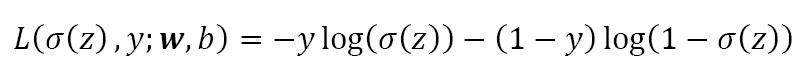

En examinant l'équation, on constate que le premier terme devient nul si y = 0, et le second terme devient nul si y = 1 :  

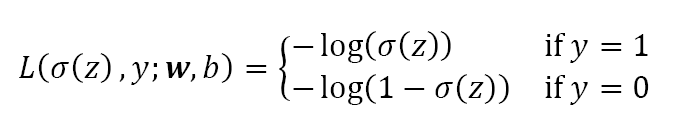

Écrivons un court extrait de code pour créer un graphique illustrant la perte de classification d'un seul exemple d'apprentissage pour différentes valeurs de $𝜎(𝑧)$ :  


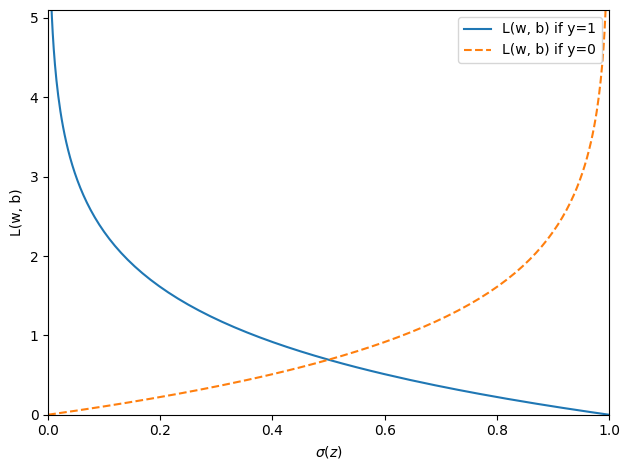

In [39]:
def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Le graphique obtenu montre l'activation sigmoïde sur l'axe des x dans la plage de 0 à 1 (les entrées de la fonction sigmoïde étaient des valeurs z dans la plage de -10 à 10) et la perte logistique associée sur l'axe des y.  

Nous pouvons voir que la perte se rapproche de 0 (ligne continue) si nous prédisons correctement qu'un exemple appartient à la classe 1. De même, nous pouvons voir sur l'axe des y que la perte s'approche également de 0 si nous prédisons correctement y = 0 (ligne en pointillés). Cependant, si la prédiction est erronée, la perte tend vers l'infini. Le point principal est que nous pénalisons les mauvaises prédictions par une perte de plus en plus importante.

## Conversion d'une implémentation d'Adaline en un algorithme de régression logistique:

Si nous devions mettre en œuvre la régression logistique nous-mêmes, nous pourrions simplement remplacer la fonction de perte, L, dans notre implémentation d'Adaline du chapitre 1, par la nouvelle fonction de perte :  

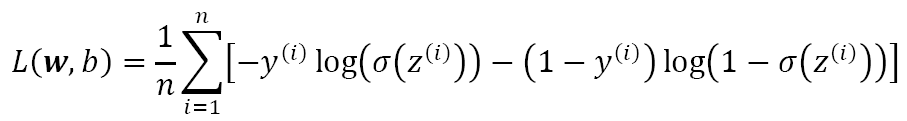

Nous l'utilisons pour calculer la perte de classification de tous les exemples d'apprentissage par epoch. Nous devons également remplacer la fonction d'activation linéaire par la fonction sigmoïde. Si nous apportons ces modifications au code d'Adaline, nous obtiendrons une implémentation fonctionnelle de la régression logistique. Ce qui suit est une implémentation pour la descente de gradient par lots complets (mais notez que les mêmes changements peuvent être apportés à la version de descente de gradient stochastique) :

In [40]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Lorsque nous ajustons un modèle de régression logistique, nous devons garder à l'esprit qu'il ne fonctionne que pour les tâches de classification binaire.

Considérons donc uniquement les fleurs setosa et versicolor (classes 0 et 1) et vérifions que notre implémentation de la régression logistique fonctionne :

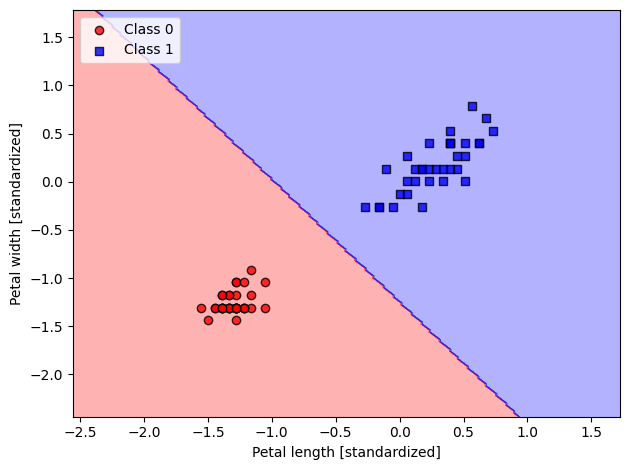

In [41]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Entraînement d'un modèle de régression logistique avec scikit-learn:

Nous allons maintenant apprendre à utiliser l'implémentation la plus optimisée de scikit-learn de la régression logistique, qui prend également en charge les paramètres multiclasses.  

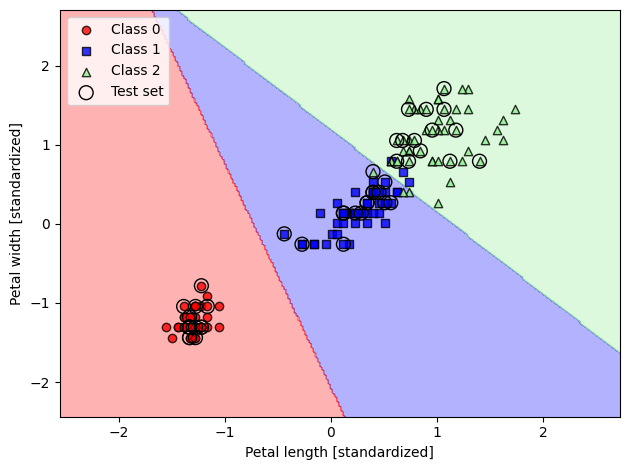

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

En regardant le code précédent que nous avons utilisé pour entraîner le modèle LogisticRegression, vous vous demandez peut-être : "Quel est ce mystérieux paramètre C ?" Nous discuterons ce paramètre dans la prochaine sous-section, où nous introduirons les concepts de surajustement et de régularisation. Cependant, avant de passer à ces sujets, terminons notre discussion sur les probabilités d'appartenance à une classe.  

La probabilité que les exemples d'apprentissage appartiennent à une certaine classe peut être calculée à l'aide de la méthode predict_ proba. Par exemple, nous pouvons prédire les probabilités des trois premiers exemples de l'ensemble de données de test comme suit :

In [43]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

La première ligne correspond aux probabilités d'appartenance à la classe de la première fleur, la deuxième ligne correspond aux probabilités d'appartenance à la classe de la deuxième fleur, et ainsi de suite. Remarquez que la somme des colonnes de chaque ligne est égale à 1, comme prévu.  

La valeur la plus élevée de la première ligne est d'environ 0,85, ce qui signifie que le premier exemple appartient à la classe 3 (Iris-virginica) avec une probabilité prédite de 85 %. Ainsi, comme vous l'avez peut-être déjà remarqué, nous pouvons obtenir les étiquettes des classes prédites en identifiant la plus grande colonne de chaque ligne, par exemple en utilisant la fonction argmax de NumPy :

In [44]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

Dans l'exemple de code précédent, nous avons calculé les probabilités conditionnelles et les avons converties en étiquettes de classe manuellement en utilisant la fonction argmax de NumPy. En pratique, la manière la plus pratique d'obtenir les étiquettes de classe lors de l'utilisation de scikit-learn est d'appeler directement la méthode predict :

In [45]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

# La régularisation pour lutter contre le surajustement

Le "surajustement" est un problème courant dans l'apprentissage automatique, lorsqu'un modèle donne de bons résultats sur des données d'apprentissage, mais ne se généralise pas bien à des données non vues (données de test). Si un modèle souffre d'un surajustement, on dit aussi qu'il a une variance élevée, ce qui peut être dû à un trop grand nombre de paramètres, conduisant à un modèle trop complexe compte tenu des données sous-jacentes. De même, notre modèle peut également souffrir d'un **sous-ajustement** (biais élevé), ce qui signifie que notre modèle n'est pas assez complexe pour bien capturer le modèle dans les données d'apprentissage et qu'il souffre donc également d'une faible performance sur les données non vues.  

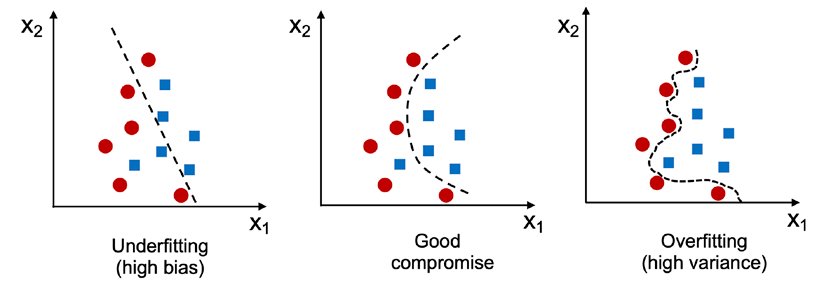

L'un des moyens de trouver un bon compromis biais-variance consiste à ajuster la complexité du modèle par la régularisation. La régularisation est une méthode très utile pour gérer la colinéarité (forte corrélation entre les caractéristiques), filtrer le bruit des données et, en fin de compte, empêcher le surajustement.  

Le concept de régularisation consiste à introduire des informations supplémentaires pour pénaliser les valeurs extrêmes des paramètres (poids). La forme la plus courante de régularisation est la régularisation L2 qui peut s'écrire comme suit :  

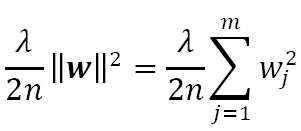

Ici, $𝜆$ est le **paramètre de régularisation**. Notez que le 2 dans le dénominateur est simplement un facteur d'échelle, de sorte qu'il s'annule lors du calcul du gradient de perte. La taille de l'échantillon n est ajoutée pour mettre à l'échelle le terme de régularisation de la même manière que la perte.  

La fonction de perte pour la régression logistique peut être régularisée en ajoutant un simple terme de régularisation, qui réduira les poids pendant l'apprentissage du modèle :  

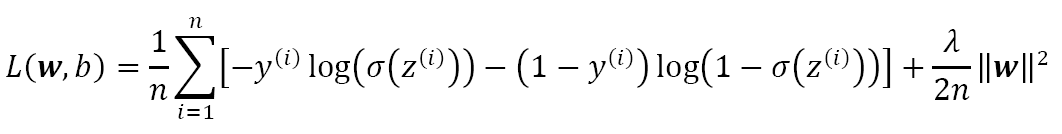

Le paramètre de régularisation, $𝜆$ , nous permet de contrôler le degré des ajustements aux données d'apprentissage, tout en maintenant les poids à un niveau faible. En augmentant la valeur de $𝜆$ , nous augmentons la force de régularisation. Veuillez noter que l'unité de biais, qui est essentiellement un terme d'interception ou un seuil négatif, comme nous l'avons appris au chapitre 1, n'est généralement pas régularisée.  

Le paramètre, C, qui est implémenté pour la classe LogisticRegression dans scikit-learn provient d'une convention dans les machines à vecteurs de support, qui sera le sujet de la section suivante. Le terme C est inversement proportionnel au paramètre de régularisation, 𝜆 . Par conséquent, la diminution de la valeur du paramètre de régularisation inverse, C, signifie que nous augmentons la force de régularisation, ce que nous pouvons visualiser en traçant le chemin de régularisation L2 pour les deux coefficients de poids :

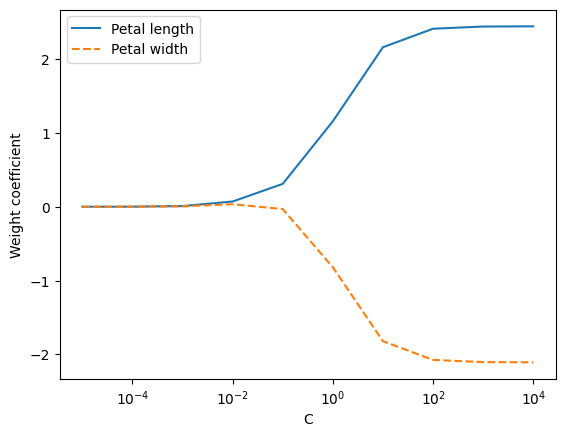

In [46]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

En exécutant le code précédent, nous avons ajusté 10 modèles de régression logistique avec différentes valeurs pour le paramètre de régularisation inverse, C. À des fins d'illustration, nous n'avons recueilli que les coefficients de pondération de la classe 1 (ici, la deuxième classe de l'ensemble de données : Iris-versicolor) par rapport à tous les classificateurs - n'oubliez pas que nous utilisons la technique OvR pour la classification multiclasse.  

Comme nous pouvons le voir dans le graphique résultant, les coefficients de pondération diminuent si nous diminuons le paramètre C, c'est-à-dire si nous augmentons la force de régularisation.  

L'augmentation de la force de régularisation peut réduire l'overfitting, on peut donc se demander pourquoi nous ne régularisons pas fortement tous les modèles par défaut. La raison est que nous devons être prudents lorsque nous ajustons la force de régularisation. Par exemple, si la force de régularisation est trop élevée et que les coefficients de pondération s'approchent de zéro, le modèle peut donner des résultats très médiocres en raison d'un sous-ajustement.

# Classification à marge maximale avec des machines à vecteurs de support:

Un autre algorithme d'apprentissage puissant et largement utilisé est la machine à vecteurs de support (SVM), qui peut être considérée comme une extension du perceptron. En utilisant l'algorithme du perceptron, nous avons minimisé les erreurs de classification. Cependant, dans les SVM, notre objectif d'optimisation est de maximiser la marge. La marge est définie comme la distance entre l'hyperplan de séparation (frontière de décision) et les exemples d'apprentissage les plus proches de cet hyperplan, appelés vecteurs de support.  

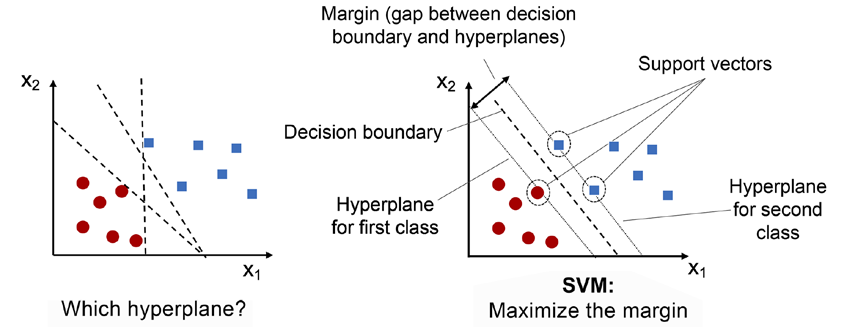

## Marge maximale  
Bien que nous ne souhaitions pas approfondir les concepts mathématiques plus complexes qui se cachent derrière la classification à marge maximale, mentionnons brièvement la variable "slack", qui a été introduite par Vladimir Vapnik en 1995 et qui a conduit à la classification dite à marge souple. L'introduction de la variable molle est motivée par le fait que les contraintes linéaires de l'objectif d'optimisation du SVM doivent être assouplies pour les données non linéairement séparables afin de permettre la convergence de l'optimisation en présence de classifications erronées, sous une pénalisation appropriée de la perte.  

L'utilisation de la variable "slack" introduit à son tour la variable communément appelée C dans les contextes SVM. Nous pouvons considérer C comme un hyperparamètre permettant de contrôler la pénalité pour les erreurs de classification. Les grandes valeurs de C correspondent à des pénalités d'erreur importantes, tandis que nous sommes moins stricts en ce qui concerne les erreurs de classification si nous choisissons des valeurs plus petites pour C. Nous pouvons alors utiliser le paramètre C pour contrôler la largeur de la marge et donc ajuster le compromis biais-variance, comme illustré dans la figure suivante :  
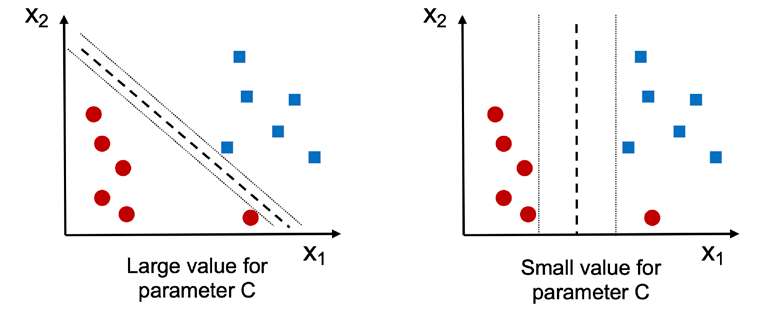

Ce concept est lié à la régularisation, que nous avons abordée dans la section précédente dans le contexte de la régression régularisée, où la diminution de la valeur de C augmente le biais (sous-adaptation) et diminue la variance (suradaptation) du modèle.  

Maintenant que nous avons appris les concepts de base d'un SVM linéaire, entraînons un modèle SVM pour classer les différentes fleurs de notre ensemble de données Iris :

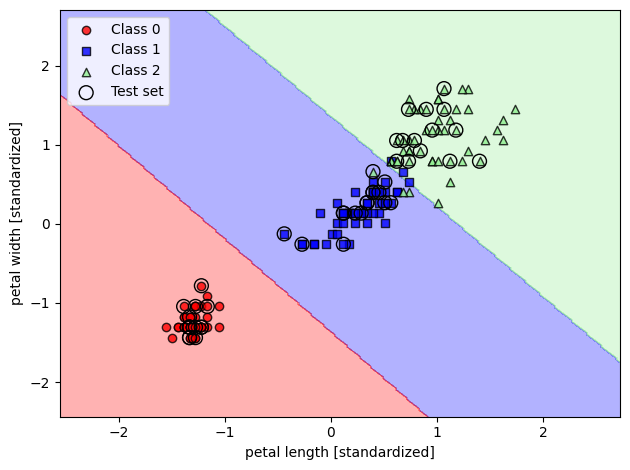

In [47]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Implémentations alternatives dans scikit-learn:

scikit-learn propose des implémentations alternatives via la classe SGDClassifier, qui supporte également l'apprentissage en ligne via la méthode partial_fit. Le concept de la classe SGDClassifier est similaire à l'algorithme du gradient stochastique que nous avons implémenté dans le chapitre 1 pour Adaline.  

Nous pourrions initialiser la version SGD du perceptron `(loss='perceptron')`, la régression logistique `(loss='log')` et un SVM avec des paramètres par défaut `(loss='hinge')`, comme suit :

In [48]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Résolution de problèmes non linéaires à l'aide d'un SVM à noyau (Kernel SVM)

Une autre raison pour laquelle les SVM jouissent d'une grande popularité parmi les praticiens de l'apprentissage automatique est qu'ils peuvent être facilement kernélisés pour résoudre des problèmes de classification non linéaire. Avant d'aborder le concept principal du SVM à noyau, la variante la plus courante des SVM, créons d'abord un ensemble de données synthétiques pour voir à quoi peut ressembler un problème de classification non linéaire.  

## Méthodes de noyaux pour les données linéairement inséparables
À l'aide du code suivant, nous allons créer un ensemble de données simple ayant la forme d'une porte XOR en utilisant la fonction logical_or de NumPy, où 100 exemples se verront attribuer l'étiquette de classe 1, et 100 exemples se verront attribuer l'étiquette de classe -1 :

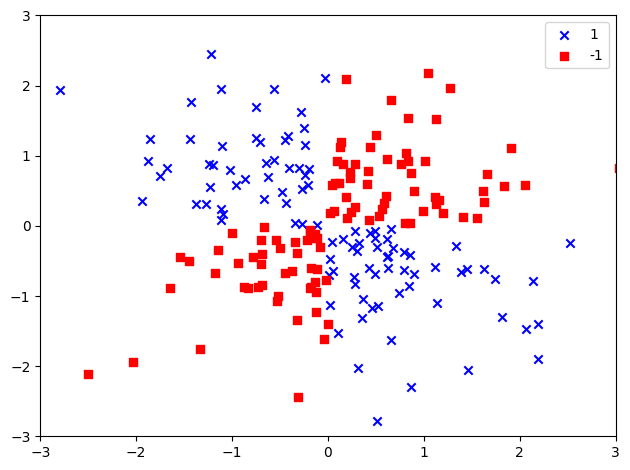

In [49]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Il est évident que nous ne pourrions pas très bien séparer les exemples des classes positives et négatives en utilisant un hyperplan linéaire comme limite de décision via la régression logistique linéaire ou le modèle SVM linéaire dont nous avons parlé dans les sections précédentes.  

L'idée de base des méthodes à noyau pour traiter ces données linéairement inséparables est de créer des combinaisons non linéaires des caractéristiques originales pour les projeter dans un espace de dimension supérieure via une fonction de mapping, 𝜙, où les données deviennent linéairement séparables. Comme le montre la figure suivante nous pouvons transformer un ensemble de données bidimensionnelles en un nouvel espace de caractéristiques tridimensionnel, où les classes deviennent séparables grâce à la projection suivante :  

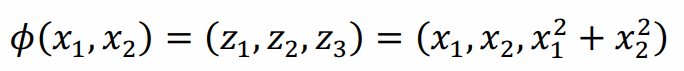

Cela nous permet de séparer les deux classes représentées sur le graphique grâce à un hyperplan linéaire qui devient une limite de décision non linéaire si nous le projetons sur l'espace des caractéristiques d'origine, comme l'illustre l'ensemble de données suivant sur les cercles concentriques :  

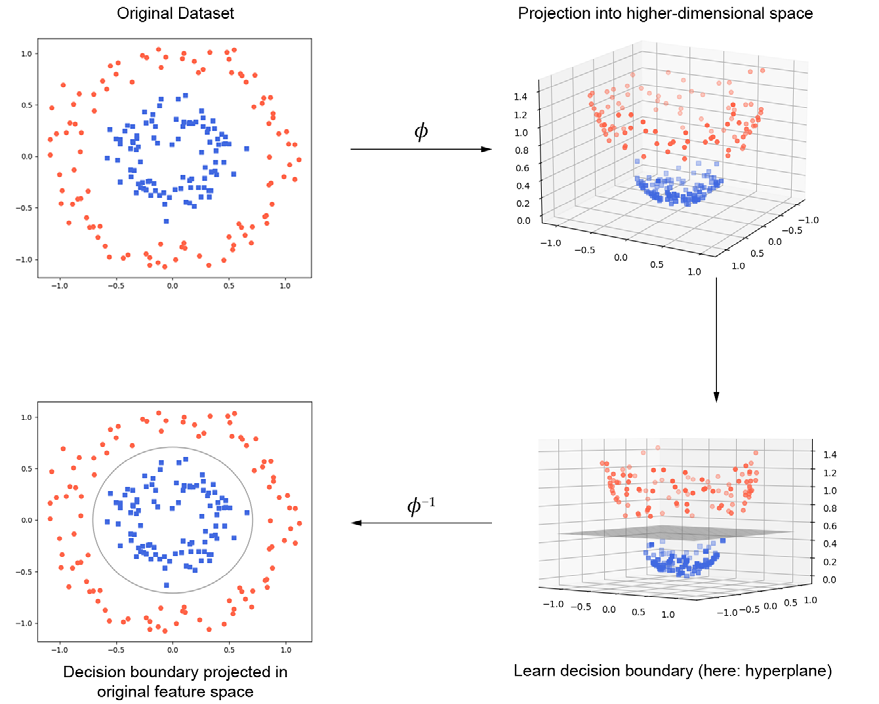

## Utilisation de l'astuce du noyau pour trouver des hyperplans de séparation dans un espace de haute dimension:

Pour résoudre un problème non linéaire à l'aide d'un SVM, nous transformons les données d'apprentissage en un espace de caractéristiques à plus haute dimension par le biais d'une fonction de mappage, $𝜙$ , et nous entraînons un modèle SVM linéaire pour classer les données dans ce nouvel espace de caractéristiques. Ensuite, nous pourrions utiliser la même fonction de mappage, $𝜙$ , pour transformer de nouvelles données non vues afin de les classer à l'aide du modèle SVM linéaire.  

Cependant, l'un des problèmes de cette approche de mappage est que la construction des nouvelles caractéristiques est très coûteuse en termes de calcul, en particulier si nous avons affaire à des données de haute dimension. C'est là que l'astuce dite du noyau entre en jeu.  

Nous n'allons pas parler de cette astuce de noyau (kernel trick) en details, mais l'astuce du noyau calcule la similarité (ou "fonction noyau") entre les points de données dans l'espace original. Cela permet au SVM d'opérer efficacement dans un espace de dimension supérieure sans le représenter explicitement. En fait, l'astuce du noyau permet aux SVM de capturer des modèles complexes et de faire des prédictions précises même lorsque les relations entre les caractéristiques ne sont pas linéaires.  

Maintenant que nous avons couvert les grandes lignes de l'astuce du noyau, voyons si nous pouvons entraîner un SVM à noyau capable de tracer une frontière de décision non linéaire qui sépare bien les données XOR. Ici, nous utilisons simplement la classe SVC de scikit-learn que nous avons importée plus tôt et remplaçons le paramètre kernel='linear' par kernel='rbf' :

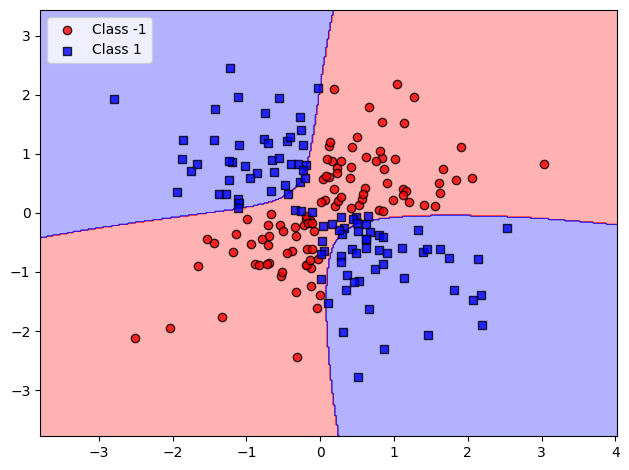

In [50]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Le paramètre $𝛾$, que nous avons fixé à gamma=0,1, peut être considéré comme un paramètre de coupure pour la sphère gaussienne. Si nous augmentons la valeur de $𝛾$ , nous augmentons l'influence ou la portée des exemples d'entrainement, ce qui conduit à une limite de décision plus étroite et plus irrégulière. Pour mieux comprendre $𝛾$ , appliquons un SVM à noyau RBF à notre ensemble de données de fleurs d'iris :

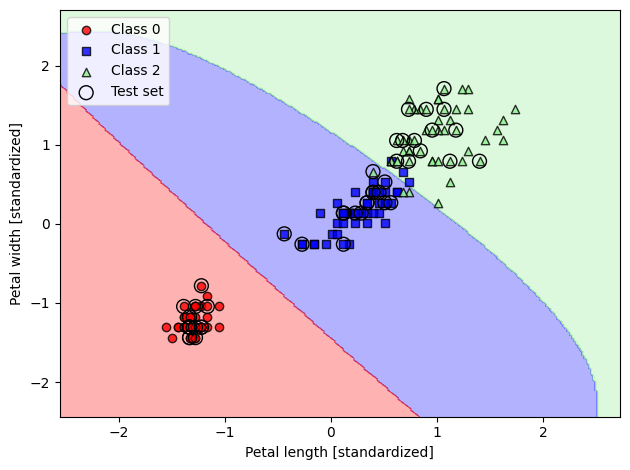

In [51]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Augmentons maintenant la valeur de 𝛾𝛾 et observons l'effet sur la frontière de décision :

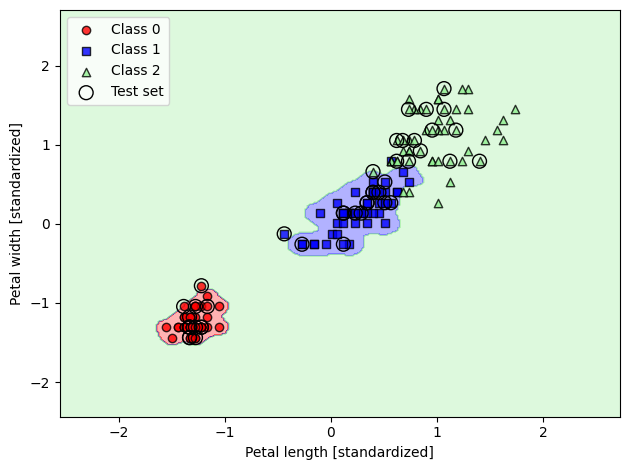

In [52]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Bien que le modèle s'adapte très bien à l'ensemble de données d'apprentissage, un tel classificateur aura probablement une erreur de généralisation élevée sur des données non vues. Cela montre que le paramètre $𝛾$ joue également un rôle important dans le contrôle de l'ajustement excessif ou de la variance lorsque l'algorithme est trop sensible aux fluctuations de l'ensemble de données d'apprentissage.  

# Apprentissage par arbre de décision:

Les classificateurs à arbre de décision sont des modèles intéressants si l'on se soucie de l'interprétabilité. Comme le suggère le nom "arbre de décision", nous pouvons considérer que ce modèle décompose nos données en prenant une décision sur la base d'une série de questions.  

Prenons l'exemple suivant, dans lequel nous utilisons un arbre de décision pour décider d'une activité un jour donné :  

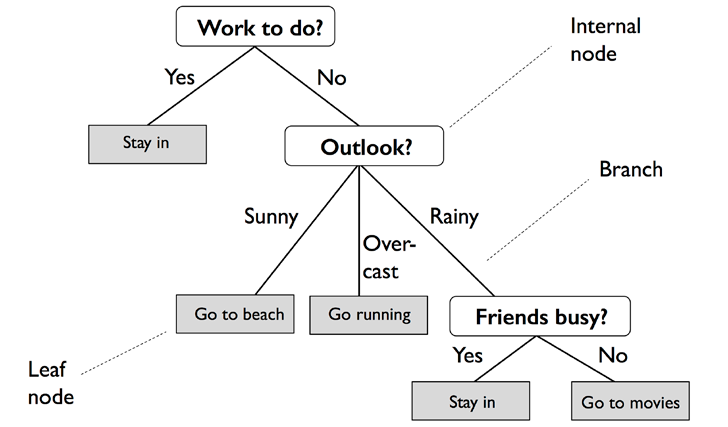

Sur la base des caractéristiques de notre ensemble de données d'apprentissage, le modèle d'arbre de décision apprend une série de questions pour déduire les étiquettes de classe des exemples. Bien que la figure illustre le concept d'un arbre de décision basé sur des variables catégorielles, le même concept s'applique si nos caractéristiques sont des nombres réels, comme dans l'ensemble de données Iris. Par exemple, nous pourrions simplement définir une valeur limite sur l'axe de la largeur du sépale et poser une question binaire : "La largeur du sépale est-elle ≥ 2,8 cm ?"  

À l'aide de l'algorithme de décision, nous commençons à la racine de l'arbre et divisons les données sur la caractéristique qui entraîne le plus grand gain d'information ("IG"), ce qui sera expliqué plus en détail dans la section suivante. Dans un processus itératif, nous pouvons ensuite répéter cette procédure de division à chaque nœud enfant jusqu'à ce que les feuilles soient pures. Cela signifie que les exemples d'apprentissage de chaque nœud appartiennent tous à la même classe. Dans la pratique, il peut en résulter un arbre très profond avec de nombreux nœuds, ce qui peut facilement conduire à un surajustement. C'est pourquoi nous souhaitons généralement tailler (pruning) l'arbre en fixant une limite pour la profondeur maximale de l'arbre.  



## Maximiser l'IG:

Pour diviser les nœuds en fonction des caractéristiques les plus informatives, nous devons définir une fonction objective à optimiser via l'algorithme d'apprentissage de l'arbre. Ici, notre fonction d'objectif consiste à maximiser l'IG à chaque division, que nous définissons comme suit :  

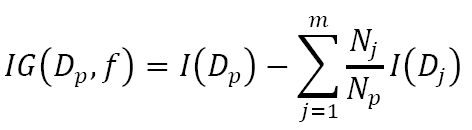

Ici, $f$ est la caractéristique à utiliser pour effectuer la division ; $D_p$ et $D_j$ sont les ensembles de données du nœud parent et du $j^{ème}$ nœud enfant ; $I$ est notre mesure d'impureté ; $N_p$ est le nombre total d'exemples d'entrainement au nœud parent ; et $N_j$ est le nombre d'exemples dans le $j^{ème}$ nœud enfant. Comme nous pouvons le constater, le gain d'information est simplement la différence entre l'impureté du nœud parent et la somme des impuretés des nœuds enfants - plus les impuretés des nœuds enfants sont faibles, plus le gain d'information est important. Cependant, pour des raisons de simplicité et de réduction de l'espace de recherche combinatoire, la plupart des bibliothèques (y compris scikit-learn) implémentent des arbres de décision binaires. Cela signifie que chaque nœud parent est divisé en deux nœuds enfants, $D_{left}$ et $D_{right}$ :  

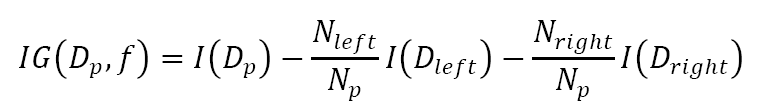

Les trois mesures d'impureté ou critères de division couramment utilisés dans les arbres décisionnels binaires sont **l'impureté de Gini ($I_G$)**, **l'entropie ($I_H$)** et **l'erreur de classification ($I_E$)**. Commençons par la définition de l'entropie pour toutes les classes non vides $(𝑝(𝑖|𝑡) ≠ 0 )$ :  

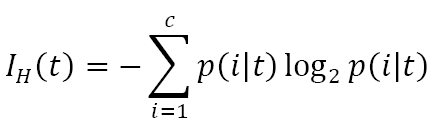


Ici, $p(i|t)$ est la proportion des exemples qui appartiennent à la classe $i$ pour un nœud particulier, $t$. L'entropie est donc égale à $0$ si tous les exemples d'un nœud appartiennent à la même classe, et l'entropie est maximale si la distribution des classes est uniforme. Par exemple, dans un contexte de classes binaires, l'entropie est de $0$ si $p(i=1|t) = 1$ ou $p(i=0|t) = 0$. Si les classes sont distribuées uniformément avec $p(i=1|t) = 0,5$ et $p(i=0|t) = 0,5$, l'entropie est de 1. Par conséquent, nous pouvons dire que le critère d'entropie tente de maximiser l'information mutuelle dans l'arbre.  

Pour donner une intuition visuelle, visualisons les valeurs d'entropie pour différentes distributions de classes à l'aide du code suivant :

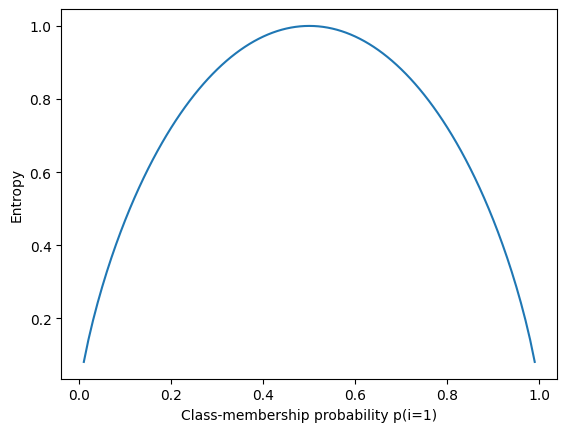

In [53]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

L'impureté de Gini peut être considérée comme un critère permettant de minimiser la probabilité d'une classification erronée :  

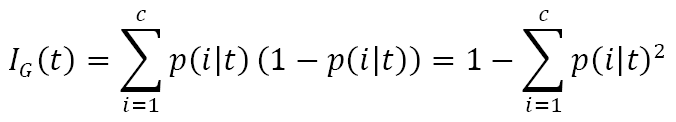

Comme pour l'entropie, l'impureté de Gini est maximale si les classes sont parfaitement mélangées, par exemple dans un contexte de classes binaires (c = 2) :  

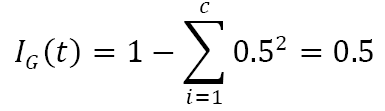

Cependant, en pratique, l'impureté de Gini et l'entropie donnent généralement des résultats très similaires, et il n'est souvent pas utile de passer beaucoup de temps à évaluer les arbres en utilisant différents critères d'impureté plutôt que d'expérimenter différents seuils de pruning.  

Une autre mesure de l'impureté est l'erreur de classification :  

$I_E(t) = 1 - max(p(i|t))$

Ce critère est utile pour le pruning, mais n'est pas recommandé pour la croissance d'un arbre de décision, car il est moins sensible aux changements dans les probabilités de classe des nœuds. Nous pouvons illustrer ce point en examinant les deux scénarios de division possibles présentés à la figure suivante :  

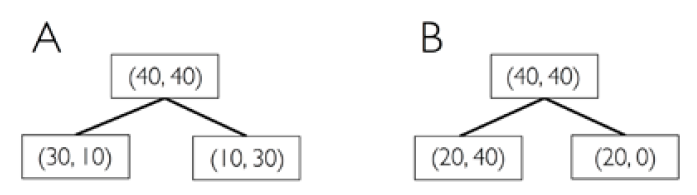

Nous commençons par un ensemble de données, $D_p$, au nœud parent, qui consiste en 40 exemples de la classe 1 et 40 exemples de la classe 2 que nous divisons en deux ensembles de données, $D_left$ et $D_right$. Le gain d'information utilisant l'erreur de classification comme critère de division serait le même ($IG_E = 0,25$) dans les deux scénarios, A et B :  

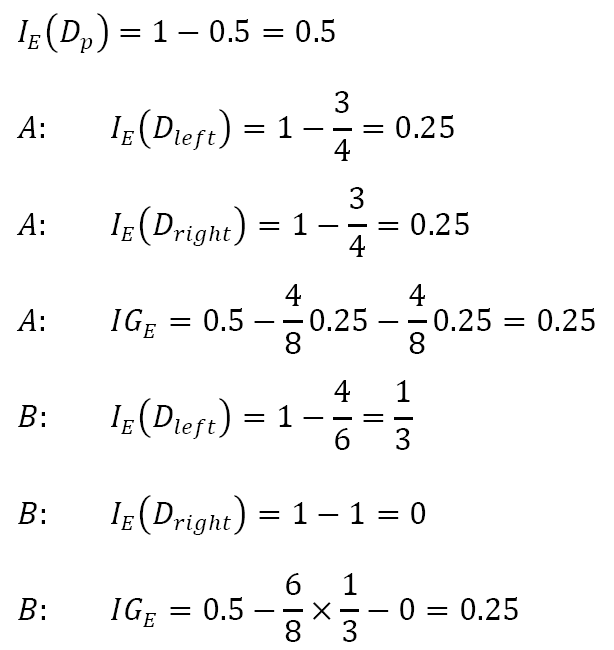

Cependant, l'impureté de Gini favoriserait la répartition dans le scénario B: $(IG_G = 0.16)$ par rapport au scénario A $(IG_G = 0,125)$, qui est en effet plus pur :  

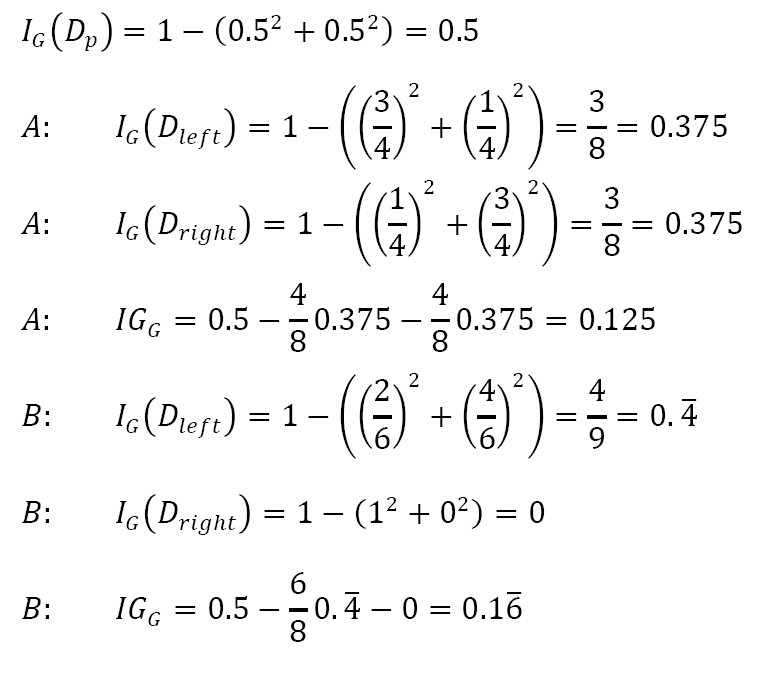

De même, le critère d'entropie favoriserait le scénario B $(IG_H = 0,31)$ par rapport au scénario A $(IG_H = 0,19)$ :  

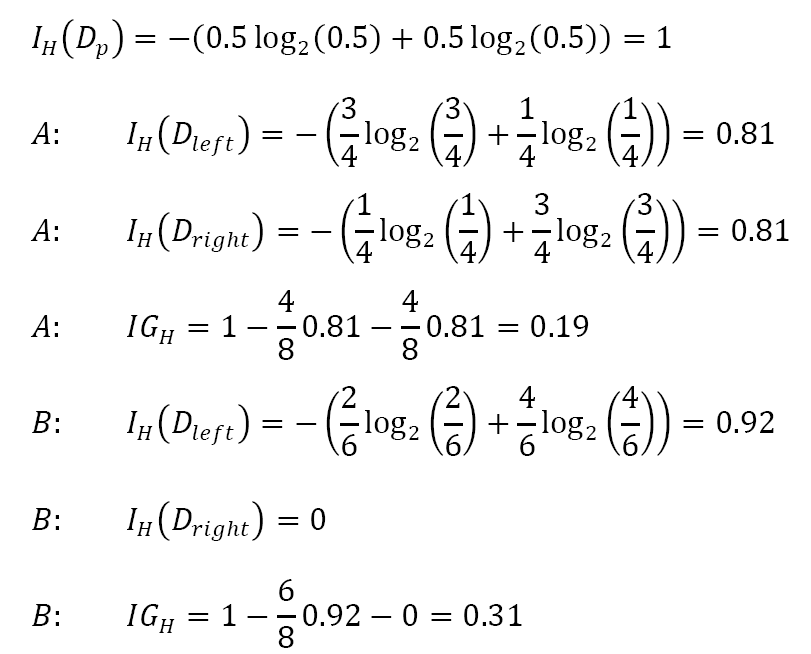

Pour une comparaison plus visuelle des trois différents critères d'impureté que nous avons examinés précédemment, représentons les indices d'impureté pour l'intervalle de probabilité [0, 1] pour la classe 1. Notez que nous ajouterons également une version mise à l'échelle de l'entropie (entropie / 2) pour observer que l'impureté de Gini est une mesure intermédiaire entre l'entropie et l'erreur de classification. Le code est le suivant :

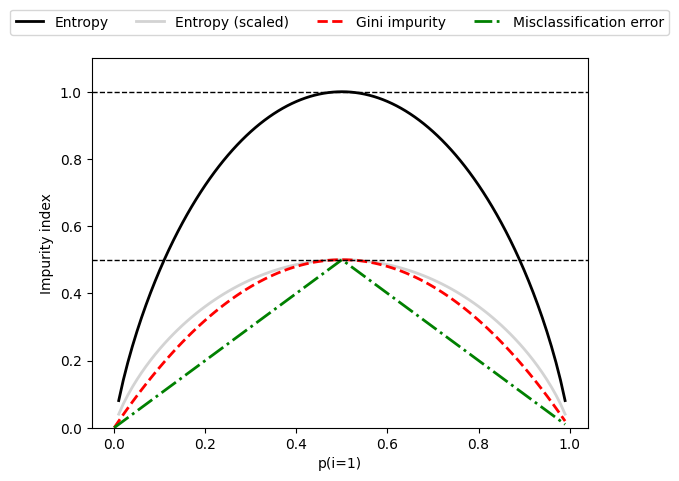

In [54]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
#plt.savefig('figures/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

# Construire un arbre de décision

Les arbres de décision peuvent construire des limites de décision complexes en divisant l'espace des caractéristiques en rectangles. Cependant, nous devons être prudents car plus l'arbre de décision est profond, plus la limite de décision devient complexe, ce qui peut facilement entraîner un surajustement. En utilisant scikit-learn, nous allons maintenant entraîner un arbre de décision avec une profondeur maximale de 4, en utilisant l'impureté de Gini comme critère d'impureté.  

Bien que la mise à l'échelle des caractéristiques puisse être souhaitée à des fins de visualisation, il convient de noter que la mise à l'échelle des caractéristiques n'est pas nécessaire pour les algorithmes d'arbres de décision. Le code est le suivant :

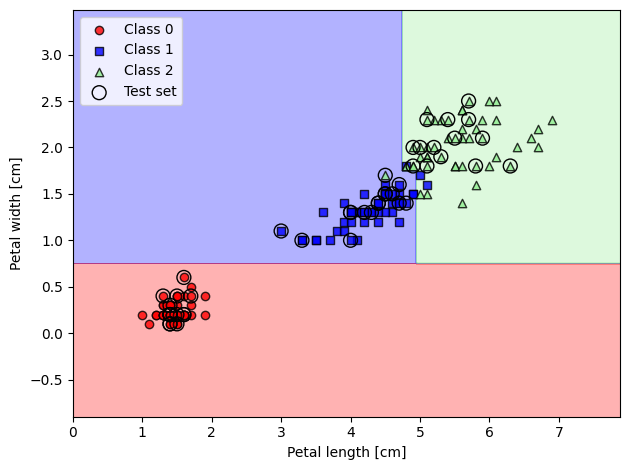

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Une fonctionnalité intéressante de scikit-learn est qu'il nous permet de visualiser facilement le modèle d'arbre de décision après l'entraînement via le code suivant :

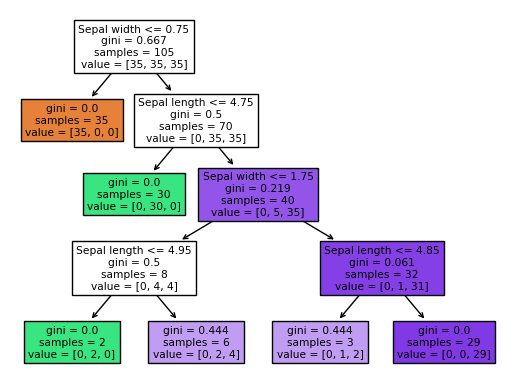

In [56]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

plt.show()

En définissant filled=True dans la fonction plot_tree que nous avons appelée, les nœuds sont coloriés en fonction de l'étiquette de la classe majoritaire au niveau de ce nœud. Il existe de nombreuses autres options disponibles, que vous pouvez trouver dans la documentation à l'adresse https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html.  

En examinant la figure de l'arbre de décision, nous pouvons maintenant retracer les divisions que l'arbre de décision a déterminées à partir de notre ensemble de données d'apprentissage. En ce qui concerne le critère de division des caractéristiques à chaque nœud, notez que les branches de gauche correspondent à "Vrai" et les branches de droite à "Faux".  

Le nœud racine commence avec 105 exemples au sommet. La première division utilise une largeur de sépale ≤ 0,75 cm pour diviser le nœud racine en deux nœuds enfants avec 35 exemples (nœud enfant gauche) et 70 exemples (nœud enfant droit). Après la première division, nous pouvons voir que le nœud enfant de gauche est déjà pur et ne contient que des exemples de la classe Iris-setosa (impureté de Gini = 0). Les autres divisions sur la droite sont ensuite utilisées pour séparer les exemples des classes Iris-versicolor et Iris-virginica.  

En observant cet arbre et le tracé de la région de décision de l'arbre, nous pouvons voir que l'arbre de décision fait un très bon travail de séparation des classes de fleurs. Malheureusement, scikit-learn n'implémente pas actuellement de fonctionnalité permettant de faire du pruning manuellement. Cependant, nous pourrions revenir à notre exemple de code précédent, changer la max_depth de notre arbre de décision à 3, et le comparer à notre modèle actuel, mais nous laissons cela comme un exercice pour l'étudiant intéressé.  

## Combinaison de plusieurs arbres de décision via des forêts aléatoires

Les méthodes d'ensemble ont acquis une grande popularité dans les applications d'apprentissage automatique au cours de la dernière décennie en raison de leurs bonnes performances de classification et de leur robustesse face à l'ajustement excessif. Une forêt aléatoire peut être considérée comme un ensemble d'arbres de décision. L'idée derrière une forêt aléatoire est de faire la moyenne de plusieurs arbres de décision (profonds) qui souffrent individuellement d'une variance élevée pour construire un modèle plus robuste qui a une meilleure performance de généralisation et est moins sensible à l'overfitting. L'algorithme de la forêt aléatoire peut être résumé en quatre étapes simples :  

1. Tirez un échantillon aléatoire bootstrap de taille n (choisissez au hasard n exemples de l'ensemble de données d'apprentissage avec remplacement).  
2. Créez un arbre de décision à partir de l'échantillon bootstrap. À chaque nœud :  

- Sélectionner aléatoirement $d$ caractéristiques sans remplacement.
- Diviser le nœud en utilisant la caractéristique qui fournit la meilleure division selon la fonction objective, par exemple, en maximisant le gain d'information.  
3. Répéter les étapes $1-2$ $k$ fois.  
4. Agréger les prédictions de chaque arbre pour attribuer l'étiquette de classe par vote majoritaire. Le vote à la majorité sera abordé plus en détail dans un chapitre ultérieur.  

Bien que les forêts aléatoires n'offrent pas le même niveau d'interprétabilité que les arbres de décision, l'un de leurs principaux avantages réside dans le fait qu'il n'est pas nécessaire de se préoccuper de choisir de bonnes valeurs d'hyperparamètres. Il n'est généralement pas nécessaire de faire le pruning de la forêt aléatoire car le modèle d'ensemble est assez robuste au bruit provenant de la moyenne des prédictions des arbres de décision individuels. Le seul paramètre dont il faut se préoccuper dans la pratique est le nombre d'arbres, k, (étape 3) que nous choisissons pour la forêt aléatoire. Généralement, plus le nombre d'arbres est élevé, meilleures sont les performances du classificateur de la forêt aléatoire, au prix d'une augmentation des coûts de calcul.  

Dans la plupart des implémentations, y compris celle de RandomForestClassifier dans scikit-learn, la taille de l'échantillon bootstrap est choisie pour être égale au nombre d'exemples d'apprentissage dans l'ensemble de données d'apprentissage original, ce qui permet généralement d'obtenir un bon compromis biais-variance. Pour le nombre de caractéristiques, d, à chaque division, nous voulons choisir une valeur qui est plus petite que le nombre total de caractéristiques dans l'ensemble de données d'apprentissage. Une valeur par défaut raisonnable utilisée dans scikit-learn et d'autres implémentations est $d = \sqrt{m}$, où m est le nombre de caractéristiques dans l'ensemble de données d'apprentissage.  

Nous n'avons pas besoin de construire nous-mêmes le classificateur de la forêt aléatoire à partir d'arbres de décision individuels, car il existe déjà une implémentation dans scikit-learn que nous pouvons utiliser :

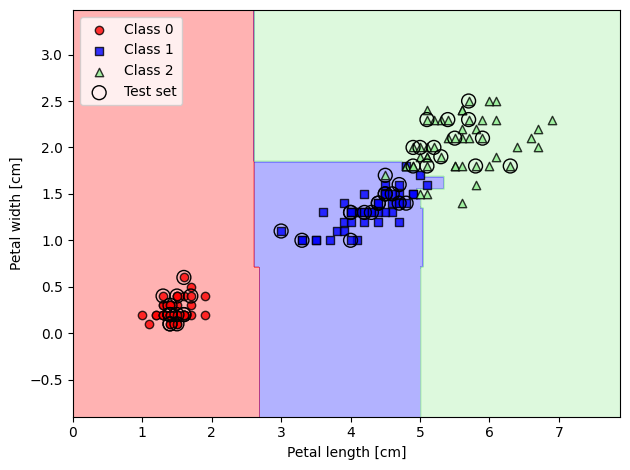

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

En utilisant le code précédent, nous avons entraîné une forêt aléatoire à partir de 25 arbres de décision via le paramètre n_estimators. Par défaut, il utilise la mesure d'impureté de Gini comme critère de division des nœuds. Bien que nous fassions croître une très petite forêt aléatoire à partir d'un très petit ensemble de données d'entraînement, nous avons utilisé le paramètre n_jobs à des fins de démonstration, ce qui nous permet de paralléliser l'entraînement du modèle en utilisant plusieurs cœurs de notre ordinateur (ici, deux cœurs). Si vous rencontrez des erreurs avec ce code, il se peut que votre ordinateur ne prenne pas en charge le multiprocessing. Vous pouvez omettre le paramètre n_jobs ou lui donner la valeur n_jobs=None.  



# K-nearest neighbors - un algorithme d'apprentissage paresseux:

Le dernier algorithme d'apprentissage supervisé que nous souhaitons aborder dans ce chapitre est le classificateur du plus proche voisin (KNN), qui est particulièrement intéressant parce qu'il est fondamentalement différent des algorithmes d'apprentissage que nous avons examinés jusqu'à présent.  

Le KNN est un exemple typique d'apprenant paresseux. Il est qualifié de "paresseux" non pas en raison de sa simplicité apparente, mais parce qu'il n'apprend pas de fonction discriminante à partir des données d'apprentissage, mais mémorise l'ensemble des données d'apprentissage.  

L'algorithme KNN lui-même est assez simple et peut être résumé par les étapes suivantes :

1. Choisir le nombre de k et une métrique de distance
2. Trouver les k-voisins les plus proches de la donnée que l'on veut classifier.
3. Attribuer l'étiquette de la classe par un vote à la majorité.  

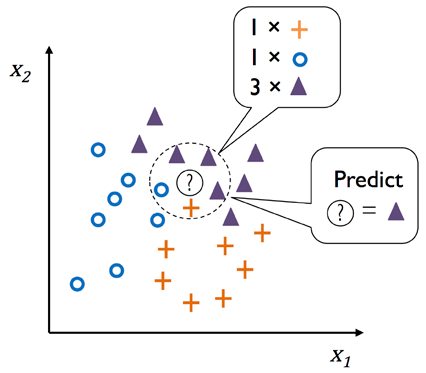

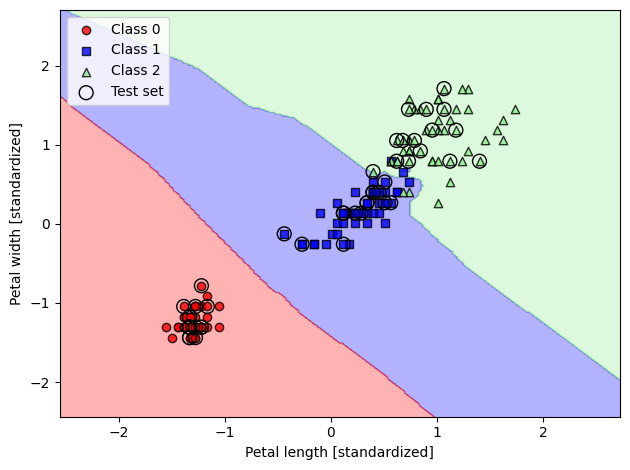

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Le bon choix de k est crucial pour trouver un bon équilibre entre l'overfitting et le underfitting. Nous devons également nous assurer que nous choisissons une mesure de distance appropriée aux caractéristiques de l'ensemble de données. Souvent, une simple mesure de distance euclidienne est utilisée pour les exemples à valeur réelle, par exemple les fleurs de notre ensemble de données Iris, dont les caractéristiques sont mesurées en centimètres. Toutefois, si nous utilisons une mesure de distance euclidienne, il est également important de standardiser les données afin que chaque caractéristique contribue de manière égale à la distance.  

Enfin, il est important de mentionner que le KNN est très susceptible d'être surajouté en raison de la malédiction de la dimensionnalité. La malédiction de la dimensionnalité décrit le phénomène selon lequel l'espace des caractéristiques devient de plus en plus clairsemé pour un nombre croissant de dimensions d'un ensemble de données d'apprentissage de taille fixe. Nous pouvons considérer que même les voisins les plus proches sont trop éloignés dans un espace à haute dimension pour donner une bonne estimation.  

